## Dataset Analysis

In this notebook we'll have a look at the resulting datasets created using the `DataPreprocessing_Aggregated.ipynb` notebook.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/mimic-iii/aggregated_all_1h/mimic-iii_train.csv')
df.head(1)

,episode,timestep,max_vaso,x0,total_iv_fluid,x1,reward,x2,x3,x4,...,x40,x41,x42,x43,x44,x45,x46,x47,action,perc_missing
0,200003,2199-08-01 22:02:00,0.0,-0.214655,0.0,-0.538247,0.0,1.068553,0.225769,-0.238059,...,-0.533695,-2.137279,-0.863924,-0.617202,-0.499452,-1.735171,-0.899866,0.345952,0.0,0.770833


### General Stats

In [2]:
episode_length = df.groupby('episode').size().mean()
print('Average length of episode:', episode_length)

Average length of episode: 72.0


### Reward Distribution

In [3]:
# reshape rewards to table with a column for each time step
rewards = df.reward.values.reshape(-1, int(episode_length))

# mean reward at terminal time step
avg_terminal_reward = np.mean(rewards[:, -1], axis=0)

print('Average terminal reward: %.3f' % avg_terminal_reward)

Average terminal reward: 10.005


In [4]:
print('All rewards:')
print('R=0  ->  %.3f %%' % (100 * np.mean(rewards == 0)))
print('R>0  ->   %.3f %%' % (100 * np.mean(rewards > 0)))
print('R<0  ->   %.3f %%' % (100 * np.mean(rewards < 0)))

All rewards:
R=0  ->  98.611 %
R>0  ->   1.158 %
R<0  ->   0.231 %


In [5]:
print('Terminal rewards:')
print('R=0  ->   %.3f %%' % (100 * np.mean(rewards[:, -1] == 0)))
print('R>0  ->  %.3f %%' % (100 * np.mean(rewards[:, -1] > 0)))
print('R<0  ->  %.3f %%' % (100 * np.mean(rewards[:, -1] < 0)))

Terminal rewards:
R=0  ->   0.000 %
R>0  ->  83.351 %
R<0  ->  16.649 %


### Action Distribution

In [6]:
print('Actions:')
action_freq = df.action.value_counts()
action_prob = 100 * action_freq / action_freq.sum()

pd.DataFrame({'Freq.':action_freq, 'Prob. (%)':action_prob})

Actions:


,Freq.,Prob. (%)
0.0,506533,76.154801
20.0,31729,4.770303
10.0,30880,4.642660
5.0,30727,4.619657
15.0,29947,4.502387
24.0,5805,0.872754
23.0,3954,0.594465
22.0,3442,0.517488
11.0,2869,0.431340
21.0,2576,0.387289


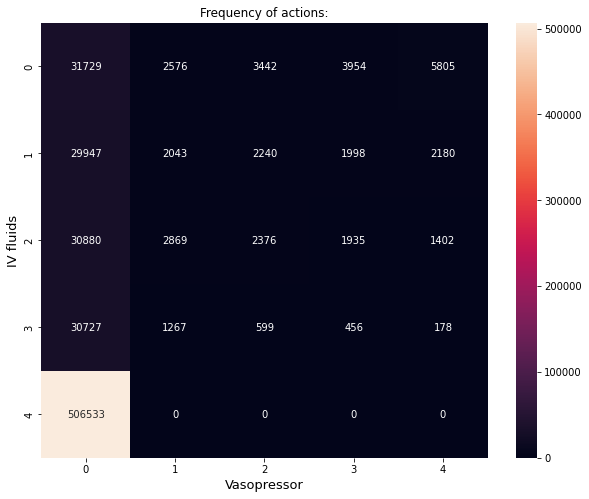

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# convert to nice action table
action_matrix = np.zeros(25)
for a, f in action_freq.iteritems():
    action_matrix[int(a)] = f
action_matrix = action_matrix.reshape(5, 5)[::-1]

plt.figure(figsize=(10, 8))
sns.heatmap(action_matrix, fmt='g', annot=True)
plt.title('Frequency of actions:')
plt.xlabel('Vasopressor', fontsize=13)
plt.ylabel('IV fluids', fontsize=13);

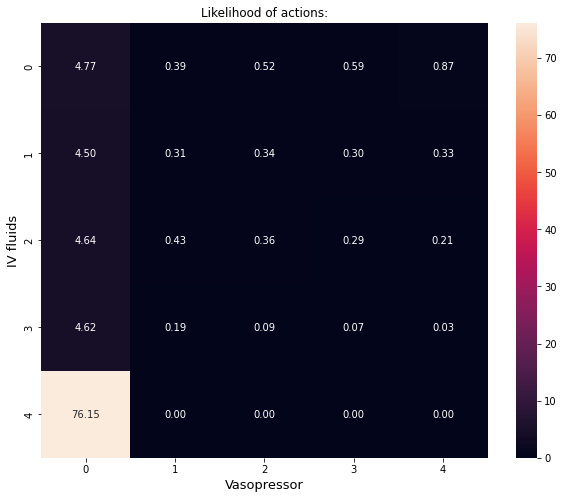

In [8]:
# convert to nice action table
action_matrix = np.zeros(25)
for a, f in action_prob.iteritems():
    action_matrix[int(a)] = f
action_matrix = action_matrix.reshape(5, 5)[::-1]

plt.figure(figsize=(10, 8))
sns.heatmap(action_matrix, fmt='.2f', annot=True)
plt.title('Likelihood of actions:')
plt.xlabel('Vasopressor', fontsize=13)
plt.ylabel('IV fluids', fontsize=13);